# Лабораторная работа №1
## Анализ пассажиров корабля "Титаник"

**Заполните недостающий код ("You code here")**

In [30]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from collections import Counter
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

** Чтение данных в Pandas DataFrame**

In [3]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Первые 5 строк**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Давайте выберем тех пассажиров, которые отправились в Cherbourg (Embarked = C) и заплатили > 200 фунтов за билет (fare > 200).**

Убедитесь, что вы понимаете, как на самом деле работает эта конструкция.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


** Мы можем отсортировать этих людей по тарифу (Fare) в порядке убывания. **

In [7]:
data[(data['Embarked'] == 'C') &
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Давайте добавим новый признак.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

**Другой способ сделать это с `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин было на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

<Axes: >

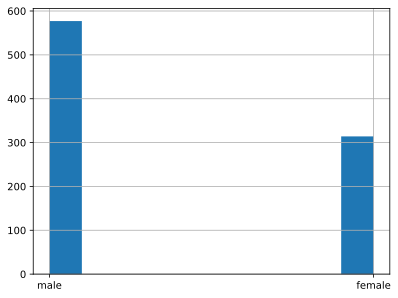

In [11]:
# male_count = data[(data['Sex'] == 'male')].Sex.count()
# female_count = data[(data['Sex'] == 'female')].Sex.count()
# print(str(male_count) + " мужчин и " + str(female_count) + " женщин")
data[(data['Sex'] == 'male')].Sex.count()
data[(data['Sex'] == 'female') | (data['Sex'] == 'male')].Sex.hist()

**2. Определите распределение функции `Pclass`. Теперь Для мужчин и женщин отдельно. Сколько людей из второго класса было на борту?**
- 104
- 108
- 112
- 125

<Axes: >

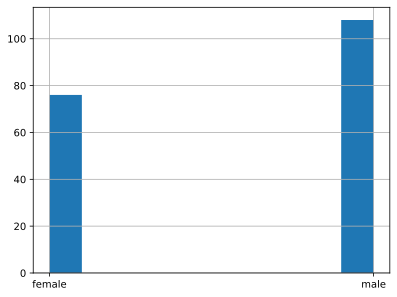

In [18]:
data[(data['Pclass'] == 2)].Sex.hist()

**3. Каковы медиана и стандартное отклонение`Fare`?. Округлите до 2-х знаков после запятой.**
- медиана 14,45, стандартное отклонение 49,69
- медиана 15,1, стандартное отклонение 12,15
- медиана 13,15, стандартное отклонение 35,3
- Медиана 17,43, стандартное отклонение - 39,1.

In [19]:
median_var = round(data.Fare.median(), 2)
std_var = round(data.Fare.std(), 2)
print("медиана " + str(median_var) + ", стандартное отклонение " + str(std_var))

медиана 14.45, стандартное отклонение 49.69


** 4. Правда ли, что средний возраст выживших людей выше, чем у пассажиров, которые в конечном итоге умерли? **
- Да
- Нет


In [ ]:
if data[(data['Survived'] == 1)].Age.mean() > data[(data['Survived'] == 0)].Age.mean(): print("Да")
else: print("Нет")

Нет


**5. Это правда, что пассажиры моложе 30 лет. выжили чаще, чем те, кому больше 60 лет. Каковы доли выживших людей среди молодых и пожилых людей?**
- 22,7% среди молодежи и 40,6% среди пожилых
- 40,6% среди молодежи и 22,7% среди пожилых
- 35,3% среди молодежи и 27,4% среди пожилых
- 27,4% среди молодежи и 35,3% среди пожилых

In [23]:
data['Возраст'] = pd.cut(data['Age'], bins=[0, 30, 60, float('inf')], labels=['Молодые', 'Средний', 'Пожилые'], right=False)
survival_rate = data.groupby('Возраст', observed=True)['Survived'].mean() * 100
elderly_survival_rate = (data[data['Age'] > 60]['Survived'].sum() / data[data['Age'] > 60]['Survived'].count()) * 100
print(f"Доля выживших старше 60: {elderly_survival_rate:.1f}%")

young_survival_rate = (data[data['Age'] < 30]['Survived'].sum() / data[data['Age'] < 30]['Survived'].count()) * 100
print(f"Доля выживших младше 30: {young_survival_rate:.1f}%")

Доля выживших старше 60: 22.7%
Доля выживших младше 30: 40.6%


**6. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших людей среди мужчин и женщин?**
- 30,2% среди мужчин и 46,2% среди женщин
- 35,7% среди мужчин и 74,2% среди женщин
- 21,1% среди мужчин и 46,2% среди женщин
- 18,9% среди мужчин и 74,2% среди женщин

In [28]:
survived_by_sex = data.groupby('Sex')['Survived'].value_counts(normalize=True) * 100

print(f"Мужчины: {survived_by_sex[('male', 1)]:.1f}%")
print(f"Женщины: {survived_by_sex[('female', 1)]:.1f}%")

Мужчины: 18.9%
Женщины: 74.2%


**7. Какое имя наиболее популярно среди пассажиров мужского пола?**
- Charles
- Thomas
- William
- John

In [40]:
def extract_first_name(name):
    match = re.search(r'\.\s*([A-Za-z]+)', name)  # Ищем слово после запятой и пробелов
    if match:
        return match.group(1)
    return None

# Применяем функцию к столбцу 'Name'
data['FirstName'] = data['Name'].apply(extract_first_name)

# Фильтруем только мужчин
male_data = data[data['Sex'] == 'male']

# Считаем частоту встречаемости имен
name_counts = Counter(male_data['FirstName'].dropna())

# Находим самые популярные имена
most_common_names = name_counts.most_common(1) # Выводим топ-10

print("Самое популярное мужское имя на Титанике:")
for name, count in most_common_names:
    print(f"{name}: {count}")


Самое популярное мужское имя на Титанике:
William: 35


**8. Как средний возраст мужчин / женщин зависит от `Pclass`? Выберите все правильные утверждения:**
- В среднем мужчины 1 класса старше 40 лет
- В среднем женщины 1 класса старше 40 лет
- Мужчины всех классов в среднем старше, чем женщины того же класса
- В среднем, пассажиры первого класса старше, чем пассажиры 2-го класса, которые старше, чем пассажиры 3-го класса.

In [41]:
average_age_by_sex_pclass = data.groupby(['Sex', 'Pclass'])['Age'].mean()

print("Средний возраст по полу и классу:")
print(average_age_by_sex_pclass)

Средний возраст по полу и классу:
Sex     Pclass
female  1         34.61
        2         28.72
        3         21.75
male    1         41.28
        2         30.74
        3         26.51
Name: Age, dtype: float64



Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.